<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Sohldruckverteilungen

## Halbraumspannungen unter schlaffen und starren Rechtecklasten

In [1]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import sympy as sp
sp.init_printing(use_latex='mathjax') #makes sympy output look nice
import scipy as scp

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/stresses_steinbrenner_plots.ipynb

## Wiederholung: Vom schlaffen Lastbündel zur starren Sohlplatte

Für die auf eine rechteckige Fläche aufgebrachte Last schließlich finden wir folgende Sohldruckverteilung im Falle der starren Platte im Vergleich zum schlaffen Lastbündel der Intensität $q$:

$$
    \frac{\sigma_0(x,y)}{q} = \frac{4}{\pi^2 \sqrt{\left[1 - 4\left( \frac{x}{a} \right)^2\right]\left[1 - 4\left( \frac{y}{b} \right)^2\right]}}
$$

Der kennzeichnende Punkt wird auf der Diagonalen der Rechteckfläche liegen. Diese Diagonale ist im auf ein Einheitsquadrat skalierten und um den Koordinatenursprung zentrierten Rechteck gekennzeichnet durch die Radialkoordinate:

$$
    \bar{r} = \frac{x}{a} = \frac{y}{b}
$$

Damit ergibt sich die Lage der vier kennzeichnenden Punkte über die Beziehung

$$
    \bar{r}_\text{K} = \pm \frac{1}{2} \sqrt{1 - \frac{4}{\pi^2}} \approx 0.386
$$


Somit gilt

\begin{align}
    x_\text{K} &\approx \pm 0.386 a
    \
    y_\text{K} &\approx \pm 0.386 b
\end{align}

Im folgenden Bild ist die Sohldruckverteilung unter dem starren Rechteckfundament dargestellt. Die graue Ebene stellt hingegen die gleichförmig verteilte Last $q$ dar. Die roten Punkte kennzeichnen die charakteristischen Punkte.

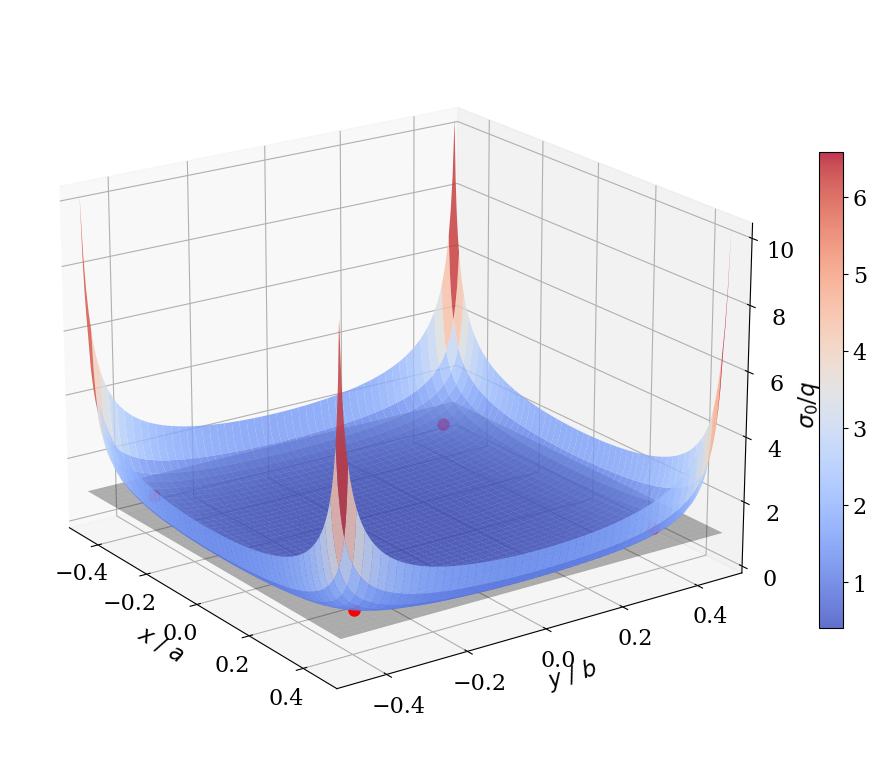

In [2]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
plot_char_pt_rect()

## Geradlinige Verteilungen des Sohldrucks

Die Sohldruckberechnung ist eine schwierige Aufgabe, da Wechselwirkungen aufgrund der Verformungen von Baugrund und Bauwerk berücksichtigt werden müssen. Für bestimmte Nachweise sind vereinfachte statische Ansätze zulässig. Bei den Grenzzuständen der Gebrauchstauglichkeit beispielsweise (Fundamentverdrehung, Begrenzung klaffender Fugen, Setzungsnachweise) sind geradlinige Verteilungen zulässig, die sich aus den Gleichgewichtsbedingungen ableiten lassen.

Wir betrachten dies nun zunächst für rechteckförmige Fundamentkörper der Abmessungen $a \times b$ in der $x-y$ Ebene (Koordinatenursprung im Schwerpunkt des Fundamentes), die durch eine Vertikallast $V$ am Angriffspunkt mit den Exzentrizitäten $(e_x,e_y)$ belastet seien.

Damit ist das Fundament begrenzt durch die Eckpunkte $(x_i,y_i)$ mit

\begin{align}
    x_i &= \{-a/2,\ -a/2,\ a/2,\ a/2\} \quad \text{für } i \in [0,3]
    \
    y_i &= \{-b/2,\ b/2,\ b/2,\ -b/2\} \quad \text{für } i \in [0,3]
\end{align}

An diesen Eckpunkten stellen sich die vier Sohlspannungen $\sigma_{0,i}$ ein, die die greadlinige (bilineare) Sohldruckverteilung bestimmen. Da drei Punkte eine Ebene definieren, ist der vierte Punkt nicht unabhängig wählbar.

Diese Spannungswerte bestimmen eine Ebene im Raum

$$
    \sigma_0(x,y) = c_0 + c_1 x + c_2 y
$$

Die Koeffizienten können aus den Eckpunktkoordinaten und den dort gegebenen Spannungswerten mittels eines linearen Gleichungssystems bestimmt werden. Die Gleichung für den 4. Punkt wäre nicht linear unabhängig -- es genügt ein $3\times 3$ System.

$$
    \begin{pmatrix}
    1 & -a/2 & -b/2 \
    1 & -a/2 & b/2\
    1 & a/2 & b/2
    \end{pmatrix}
    \begin{pmatrix}
        c_0 \
        c_1 \
        c_2
    \end{pmatrix}
    = 
    \begin{pmatrix}
        \sigma_{0,0} \
        \sigma_{0,1} \
        \sigma_{0,2}
    \end{pmatrix}
$$

Wir nutzen Sie hier allerdings gleich, um die Spannung am 4. Eckpunkt zu berechnen.
 
$$
    \begin{pmatrix}
    1 & -a/2 & -b/2 & 0\
    1 & -a/2 & b/2 & 0\
    1 & a/2 & b/2 & 0\
    1 & a/2 & -b/2 & -1
    \end{pmatrix}
    \begin{pmatrix}
        c_0 \
        c_1 \
        c_2 \
        \sigma_{0,3}
    \end{pmatrix}
    = 
    \begin{pmatrix}
        \sigma_{0,0} \
        \sigma_{0,1} \
        \sigma_{0,2} \
        0
    \end{pmatrix}
$$

In [3]:
#HIDDEN
a, b, s0, s1, s2, s3 = sp.symbols('a b \sigma_0 \sigma_1 \sigma_2 \sigma_3')

In [4]:
s_vec = sp.Matrix([s0,s1,s2,0])
A = sp.Matrix([[1, -a/2, -b/2, 0],
              [1, -a/2, b/2, 0],
              [1, a/2, b/2, 0],
              [1, a/2, -b/2, -1]])

In [5]:
c_vec = A.LUsolve(s_vec)

In [6]:
sp.factor(c_vec)

⎡     \sigma₀   \sigma₂     ⎤
⎢     ─────── + ───────     ⎥
⎢        2         2        ⎥
⎢                           ⎥
⎢    -\sigma₁ + \sigma₂     ⎥
⎢    ──────────────────     ⎥
⎢            a              ⎥
⎢                           ⎥
⎢    -\sigma₀ + \sigma₁     ⎥
⎢    ──────────────────     ⎥
⎢            b              ⎥
⎢                           ⎥
⎣\sigma₀ - \sigma₁ + \sigma₂⎦

Wir sehen, dass der erste Wert der "diagonale" Mittelwert dem Verteilung entspricht:

$$
    c_0 = \frac{\sigma_{0,0} + \sigma_{0,2}}{2}
$$

Der zweite Wert ist der mittlere Anstieg in $x$-Richtung:

$$
    c_1 = \frac{\sigma_{0,2} - \sigma_{0,1}}{a}
$$

Der dritte Wert entspricht dem mittleren Anstieg in $y$-Richtung:

$$
    c_2 = \frac{\sigma_{0,1} - \sigma_{0,0}}{b}
$$

Der Spannung am 4. Eckpunkt ergibt sich ausgehend vom Mittelwert durch die bereits bekannten Anstiege zu

$$
    \sigma_{0,3} = \sigma_{0,0} - \sigma_{0,1} + \sigma_{0,2}
$$

Damit lässt sich die Verteilung der Spannungen wie folgt schreiben:

$$
    \sigma_0(\xi,\eta) = \frac{\sigma_{0,0} + \sigma_{0,2}}{2} + \left( \sigma_{0,2} - \sigma_{0,1} \right) \xi + \left( \sigma_{0,1} - \sigma_{0,0} \right) \eta \quad \text{mit} \quad \xi = \frac{x}{a} \in [-0.5,0.5],\ \eta = \frac{y}{b} \in [-0.5,0.5]
$$

In [7]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge_lin()

interactive(children=(IntSlider(value=100, description=r'$\sigma_{0,0}$ / kPa', max=150, min=50), IntSlider(va…

Diese Verteilung muss nun im statischen Gleichgewicht mit der Belastung $V$ sein. Konkret bedeutet das, dass die Resultierende dieser Flächenlast betragsmäßig gleich aber entgegengesetzt gerichtet zu $V$ sein muss, also $\vec{R} = -\vec{V}$ und denselben Angriffspunkt in der $x-y$ Ebene haben muss. Der Betrag $|\vec{R}|$ ergibt sich aus dem Mittelwert der Flächenlast, die Exzentrizitäten aus der Ermittlung des Schwerpunktes, jeweils unter Berücksichtigung der Wirkfläche.

$$
    R = \int \limits_{-\frac{b}{2}}^{\frac{b}{2}} \int \limits_{-\frac{a}{2}}^{\frac{a}{2}} \sigma_0(x,y)\, \text{d}x\,\text{d}y = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\, a\text{d}\xi\, b\text{d}\eta
$$

In [8]:
#HIDDEN
xi, eta = sp.symbols('xi eta')

In [9]:
sig = (s0+s2)/2 + (s2-s1)*xi + (s1-s0)*eta

In [10]:
R = sp.integrate(sp.integrate(sig*a*b,(xi,-0.5,0.5)),(eta,-0.5,0.5))
sp.factor(R)

0.5⋅a⋅b⋅(\sigma₀ + \sigma₂)

Wir finden also wieder unsere mittlere Spannung

Die Schwerpunktlage ergibt sich durch Äquivalenz der Drehmomente der Flächenlast und der Resultierenden um die Achsen $x$ bzw. $y$, z.B.

$$
    R e_x = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\,a\xi \, a\text{d}\xi\,b\text{d}\eta
$$

so dass

\begin{align}
    e_x &= \frac{1}{R} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\,a\xi \, a\text{d}\xi\,b\text{d}\eta
    \
    e_y &= \frac{1}{R} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \int \limits_{-\frac{1}{2}}^{\frac{1}{2}} \sigma_0(\xi,\eta)\,b\eta \, a\text{d}\xi\,b\text{d}\eta
\end{align}

In [11]:
e_x = sp.integrate(sp.integrate(sig*xi*a*a*b,(xi,-1/2,1/2)),(eta,-1/2,1/2))/R
sp.factor(e_x)

-0.166666666666667⋅a⋅(1.0⋅\sigma₁ - \sigma₂) 
─────────────────────────────────────────────
              \sigma₀ + \sigma₂              

In [12]:
e_y = sp.integrate(sp.integrate(sig*eta*b*a*b,(xi,-0.5,0.5)),(eta,-0.5,0.5))/R
sp.factor(e_y)

-0.166666666666667⋅b⋅(1.0⋅\sigma₀ - \sigma₁) 
─────────────────────────────────────────────
              \sigma₀ + \sigma₂              

Somit ergeben sich die Exzentrizitäten

$$
    e_x = \frac{(\sigma_{0,2} - \sigma_{0,1})ab}{2R} \frac{a}{6} \quad \text{und} \quad e_y = \frac{(\sigma_{0,1} - \sigma_{0,0})ab}{2R} \frac{b}{6} \quad \text{mit} \quad 2 R = (\sigma_{0,0} + \sigma_{0,2})ab
$$

Durch Umstellen der Gleichung können wir nun den üblichen Fall betrachten: Wir kennen $V$, $e_x$ sowie $e_y$ und suchen die zugehörige Spannungsverteilung. Dazu sammeln wir hier nochmals die gegebenen Gleichungen:

\begin{align}
    2V &= ab (\sigma_{0,0} + \sigma_{0,2})\
    12 V \frac{e_x}{a} &= (\sigma_{0,2} - \sigma_{0,1})ab\
    12 V \frac{e_y}{b} &= (\sigma_{0,1} - \sigma_{0,0})ab
\end{align}

Aus diesen drei in den Eckspannungen linearen Gleichungen lässt sich die Spannungsverteilung bestimmen:

$$
    \begin{pmatrix}
    1 & 0 & 1 \
    0 & -1 & 1\
    -1 & 1 & 0\
    \end{pmatrix}
    \begin{pmatrix}
        \sigma_{0,0} \
        \sigma_{0,1} \
        \sigma_{0,2}
    \end{pmatrix}
    =
    \frac{2V}{ab}
    \begin{pmatrix}
        1 \
        6 \frac{e_x}{a} \
        6 \frac{e_y}{b}
    \end{pmatrix}
$$

In [13]:
#HIDDEN
V, ex, ey = sp.symbols('V e_x e_y')

In [14]:
RHS = 2*V/(a*b) * sp.Matrix([1, 6*ex/a, 6*ey/b])
A = sp.Matrix([[1,0,1],
              [0,-1,1],
              [-1,1,0]])

In [15]:
s_vec = A.LUsolve(RHS)
sp.factor(s_vec)

⎡ V    6⋅V⋅e_y   6⋅V⋅eₓ⎤
⎢─── - ─────── - ──────⎥
⎢a⋅b        2      2   ⎥
⎢        a⋅b      a ⋅b ⎥
⎢                      ⎥
⎢ V    6⋅V⋅e_y   6⋅V⋅eₓ⎥
⎢─── + ─────── - ──────⎥
⎢a⋅b        2      2   ⎥
⎢        a⋅b      a ⋅b ⎥
⎢                      ⎥
⎢ V    6⋅V⋅e_y   6⋅V⋅eₓ⎥
⎢─── + ─────── + ──────⎥
⎢a⋅b        2      2   ⎥
⎣        a⋅b      a ⋅b ⎦

In [16]:
#\sigma_{0,3}
s_vec[0] - s_vec[1] + s_vec[2]

 V    6⋅V⋅e_y   6⋅V⋅eₓ
─── - ─────── + ──────
a⋅b        2      2   
        a⋅b      a ⋅b 

Somit ergeben sich die Spannungen aus dem Mittelwert und einer Permutation der exzentrischen Anteile:

\begin{align}
    \begin{pmatrix}
        \sigma_{0,0} \
        \sigma_{0,1} \
        \sigma_{0,2} \
        \sigma_{0,3}
    \end{pmatrix}
    =
    \frac{V}{ab}
    \begin{pmatrix}
        1 - 6\frac{e_x}{a} - 6 \frac{e_y}{b} \
        1 - 6\frac{e_x}{a} + 6 \frac{e_y}{b} \
        1 + 6\frac{e_x}{a} + 6 \frac{e_y}{b} \
        1 + 6\frac{e_x}{a} - 6 \frac{e_y}{b}
    \end{pmatrix}
\end{align}

In der folgenden Darstellung wird die auf die Fundamentplatte wirkende Kraft durch die schwarze Linie repräsentiert. Die Variation ihres Betrags und Angriffspunktes führt zur entsprechenden Variation der Spannungsverteilung.

In [17]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge_lin_V()

interactive(children=(IntSlider(value=100, description=r'$V$ / $ab$', max=200, step=5), FloatSlider(value=0.0, …

Die einzelnen Spannungen lassen sich durch die Gleichung

$$
    \sigma_{0,i} = \frac{V}{ab} \left( 1 \pm 6 \frac{|e_x|}{a} \pm 6 \frac{|e_y|}{b} \right)
$$

und entsprechende Variation der Vorzeichen zusammenfassen. Zugspannungen treten also auf, wenn der Klammerausdruck negativ wird. Um überall in der Sohlfuge Druckspannungen sicherzustellen muss also gelten:

$$
    1 \pm 6 \frac{|e_x|}{a} \pm 6 \frac{|e_y|}{b} \geq 0
$$

Die dadurch ausgewiesene sogenannte 1. Kernweite wird durch folgende vier Geraden begrenzt:

$$
    \pm \frac{|e_x|}{a} \pm \frac{|e_y|}{b} = \frac{1}{6}
$$

In [18]:
#HIDDEN
interactive_sohlfuge_lin_V(True)

interactive(children=(IntSlider(value=100, description=r'$V$ / $ab$', max=200, step=5), FloatSlider(value=0.0, …

Da Zugspannungen in der Fundamentsohle nicht übertragen werden können, ist die lineare Spannungsverteilung bei Kraftangriffspunkten außerhalb der ersten Kernweite nicht mehr gültig! Was passiert dann? Wir schauen uns der Einfachheit halber den Fall mit variablem $e_x$ aber $e_y \equiv 0$ an und fassen die bisherige Lösung zusammen:

\begin{align}
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [0, a/6]
    \
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [-a/6,0]
\end{align}

Es kommt bei Überschreiten der Grenzen zu einer Spannungsumlagerung vom unbelasteten Bereich (die rechnerischen Zugspannungen werden zu Null gesetzt) in den noch belasteten Bereich. Dadurch kommt es zu einer sog. klaffenden Fuge. Gleichzeitig erhöht sich die kraftseitige Eckspannung. Wir führen als Unbekannte diese Eckspannung und die Koordinate der Nulllinie $x_0$ ein. Ohne Einschränkung der Allgemeinheit nehmen wir $x_0 \geq 0$ an. Damit ist die Eckspannung bei $x = a/2$ positiv, die Spannungen bei $x \in [-a/2, x_0]$ verschwinden, sobald $x_0 > a/6$ gilt.

Wir fassen zusammen:

\begin{align}
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [0, a/6]
    \
    \sigma_0(x=-\frac{a}{2}) &= \frac{V}{ab} \left( 1 + 6 \frac{e_x}{a} \right) \text{  und  } \sigma_0(x=\frac{a}{2}) = \frac{V}{ab} \left( 1 - 6 \frac{e_x}{a}  \right) \quad \text{für} \quad e_x \in [-a/6,0]
\end{align}

bzw.

$$
    \sigma_0(x,y) = \frac{V}{ab} \left(1 + 12 \frac{e_x}{a} \frac{x}{a} \right)
$$

Die sich danach einstellende Funktion können wir allgemein darstellen durch

$$
    \sigma_0(x,y) = \text{max} \left\{ \text{sign}(e_x) \frac{\sigma_\text{E}}{-\text{sign}(e_x)\text{sign}(x_0)|x_0| + a/2} (x - x_0),\ 0 \right\}
$$

wobei $\sigma_\text{E}$ die Spannung am Eckpunkt und $x_0$ die Koordinate der Nullinie ist, an der die Spannungen rechnerisch in Zugspannungen übergehen würden. An Stelle dieser negativen Werte wird die Funktion dort auf 0 begrenzt.

Aus dem vertikalen Kräftegleichgewicht (wir schauen uns den Fall $e_x < -a/6$ an) erhalten wir:

$$
    V = b\int \limits_{-a/2}^{x_0} -\frac{\sigma_\text{E}}{x_0 + a/2} (x - x_0) \,\text{d}{x} = \frac{\sigma_\text{E}}{2} \left(x_0 + \frac{a}{2}\right)b = \frac{\sigma_\text{E}ab}{2} \left(\frac{x_0}{a} + \frac{1}{2}\right)
$$

was erwartungsgemäß der Resultierenden einer Dreieckslast auf der ausgewiesenen Fläche entspricht. Die Kraft $V$ muss nun im Schwerpunkt dieser Dreieckslast angreifen, weswegen gelten muss (Momentengleichgewicht um $y$):

$$
    e_x = \frac{x_0 + a/2}{3} - \frac{a}{2}
$$

Also gilt:

\begin{align}
    x_0 &= a + 3 e_x\
    \sigma_\text{E} &= \frac{2V}{3ab} \left[\frac{1}{2} + \frac{e_x}{a} \right]^{-1}
\end{align}

Allgemein gilt also:

\begin{align}
    x_0 &= \text{sign}(e_x) (3 |e_x| - a)\
    \sigma_\text{E} &= \frac{2V}{3ab} \left[\frac{1}{2} - \frac{|e_x|}{a} \right]^{-1}
\end{align}

Wir stellen die Lösung dar. Wir achten zudem auf den Fall $x_0$ = 0, der sich ergibt wenn

$$
    |e_x| = \frac{a}{3}
$$

Diese Grenze wird als zweite Kernweite bezeichnet. Liegt der Kraftangriffspunkt innerhalb der 2. Kernweite, so reicht die klaffende Fuge höchstens bis zum Schwerpunkt des Fundaments. Soll diese Bedingung eingehalten werden, muss also gelten

$$
    |e_x| \leq \frac{a}{3}
$$

In [19]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_kern2()

interactive(children=(FloatSlider(value=0.0, description=r'$e_x$ / $a$', max=0.45, min=-0.45, step=0.01), Outpu…

Die Erweiterung der zweiten Kernweite auf das Rechteckfundament ergibt folgende Bedingung an die Kraftangriffspunkte:

$$
    \left( \frac{e_x}{a} \right)^2 + \left( \frac{e_y}{b} \right)^2 \leq \frac{1}{9}
$$

Diese Gleichung beschreibt eine Ellipse.

**Achtung**: Bei Verlassen der ersten Kernweite unten dauern die Berechnungen etwas länger, da die Kräfte und Momentengleichgewichte der Einfachheit halber numerisch ausgewertet werden.

In [20]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_sohlfuge_lin_V(True,True,True)

interactive(children=(IntSlider(value=100, description=r'$V$ / $ab$', max=200, step=5), FloatSlider(value=0.0, …

Zum Abschluss wird nocheinmal ein auf der zweiten Kernlinie liegender Kraftangriffspunkt dargestellt.

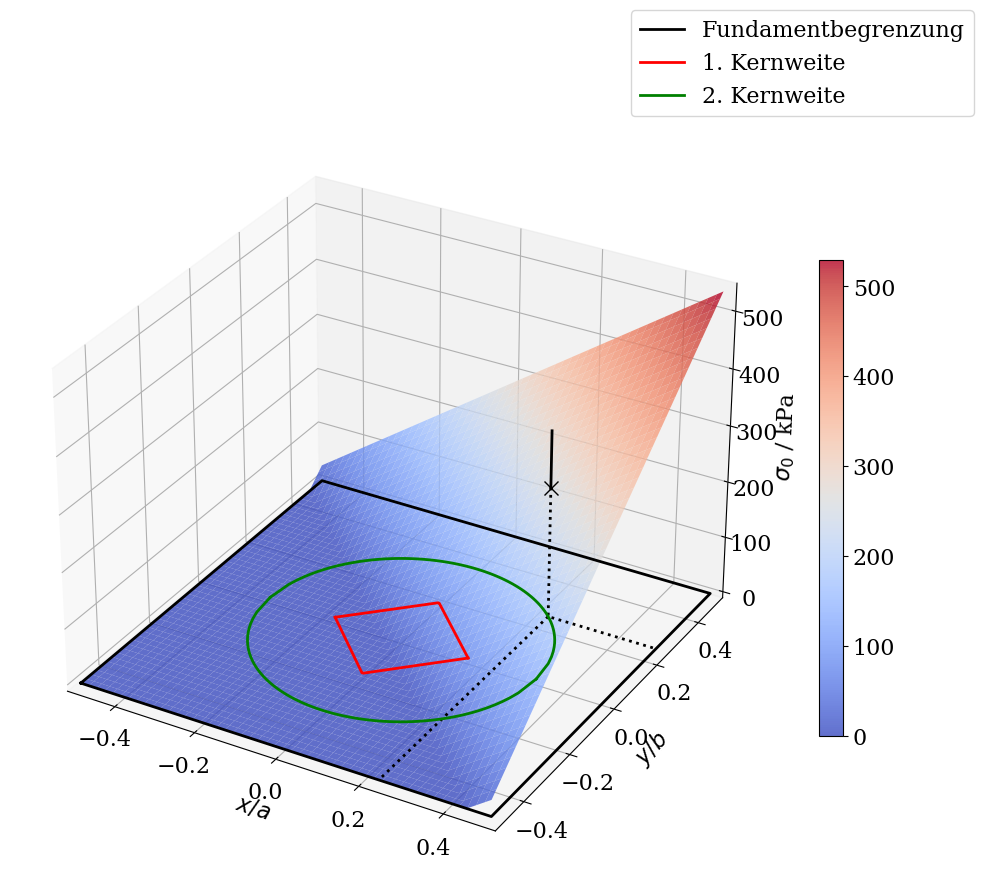

In [21]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
plot_lin_rect_V(100,np.sqrt(1/18),np.sqrt(1/18))

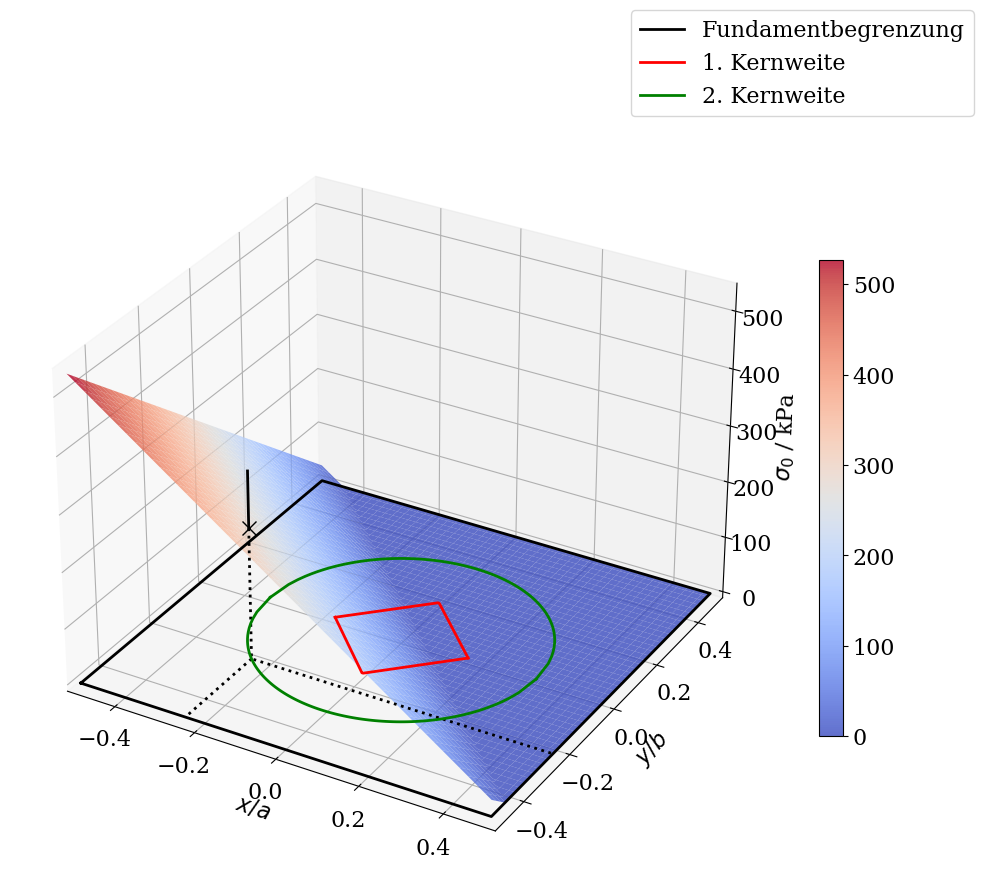

In [22]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
plot_lin_rect_V(100,-np.sqrt(1/18),-np.sqrt(1/18))

## Ergänzung: alternative Herleitung des Spannungstrapezes

Der Kraftangriffspunkt liege innerhalb der 1. Kernweite (keine klaffende Fuge). Mit der Beschränkung auf geradlinige (ebene) Spannungsverteilungen reduzieren wir das Problem auf eines der statischen Äquivalenz zwischen Fundamentbelastung $V$ und Sohldruckverteilung $\sigma_0(x,y)$. Wichtig bei der Herleitung ist das Beachten der Vorzeichenregeln (Rechtssysteme), die in der technischen Mechanik eingeführt wurden. Zur Erinnerung dient die folgende Abbildung:

<img src="https://raw.githubusercontent.com/nagelt/Teaching_Scripts/master/Images/Gleichgewicht_Sohlfuge.png" style="width: 600px;"/>

Die Gleichgewichtsbedingungen lauten für diesen Fall:

\begin{align}
    V &= \int \limits_A \sigma_0\,\text{d}A
    \
    V e_x = -M_y &= \int \limits_A \sigma_0 x\,\text{d}A
    \
    V e_y = M_x &= \int \limits_A \sigma_0 y\,\text{d}A
\end{align}

Die Beschränkung auf ebene Verteilungen liefert folgende Beziehung für die Spannungsverteilung

\begin{align}
    \sigma_0(x,y) &= \bar{\sigma}_0 + \tan \alpha_x x + \tan \alpha_y y
\end{align}

wobei die $\tan \alpha_i$ die Anstiege in die Richtung $i \in \{x, y\}$ darstellen. Diese Beziehung lässt sich integrieren und wir finden:

\begin{align}
    V &= \int \limits_{y} \int \limits_{x} (\bar{\sigma}_0 + \tan \alpha_x x + \tan \alpha_y y)\,\text{d}x\,\text{d}y
    \
    &= \bar{\sigma}_0 \int \limits_{y} \int \limits_{x} \text{d}x\,\text{d}y + \tan \alpha_x \int \limits_{y} \int \limits_{x} x\,\text{d}x\,\text{d}y + \tan \alpha_y \int \limits_{y} \int \limits_{x} y\,\text{d}x\,\text{d}y
    \
    &= \bar{\sigma}_0 A
    \
    V e_x = -M_y &= \int \limits_A \sigma_0 x\,\text{d}A
    \
    &= \bar{\sigma}_0 \int \limits_{y} \int \limits_{x} x \text{d}x\,\text{d}y + \tan \alpha_x \int \limits_{y} \int \limits_{x} x^2\,\text{d}x\,\text{d}y + \tan \alpha_y \int \limits_{y} \int \limits_{x} xy\,\text{d}x\,\text{d}y
    \
    &= \tan \alpha_x I_y - \tan \alpha_y I_{xy}
    \
    V e_y = M_x &= \int \limits_A \sigma_0 y\,\text{d}A
    \
    &= \bar{\sigma}_0 \int \limits_{y} \int \limits_{x} y \text{d}x\,\text{d}y + \tan \alpha_x \int \limits_{y} \int \limits_{x} xy\,\text{d}x\,\text{d}y + \tan \alpha_y \int \limits_{y} \int \limits_{x} y^2\,\text{d}x\,\text{d}y
    \
    &= -\tan \alpha_x I_{xy} + \tan \alpha_y I_{x}
\end{align}

Somit ergibt sich

$$
\begin{pmatrix}
    M_x\
    M_y
\end{pmatrix}
=
\begin{pmatrix}
    -I_{xy} & I_x\
    -I_y & I_{xy}
\end{pmatrix}
\begin{pmatrix}
    \tan \alpha_x\
    \tan \alpha_y
\end{pmatrix}
$$

und wir lösen nach den unbekannten Anstiegen auf:

In [23]:
#HIDDEN
Ix, Ixy, Iy, Mx, My = sp.symbols('I_x I_xy I_y M_x M_y')

In [24]:
RHS = sp.Matrix([Mx, My])
A = sp.Matrix([[-Ixy, Ix],
              [-Iy, Ixy]])

In [25]:
sol = A.LUsolve(RHS)
sp.simplify(sol)

⎡-Iₓ⋅M_y + I_xy⋅Mₓ ⎤
⎢───────────────── ⎥
⎢               2  ⎥
⎢  Iₓ⋅I_y - I_xy   ⎥
⎢                  ⎥
⎢-I_xy⋅M_y + I_y⋅Mₓ⎥
⎢──────────────────⎥
⎢               2  ⎥
⎣  Iₓ⋅I_y - I_xy   ⎦

Die Sohldruckverteilung nach dem Spannungstrapezverfahren liefert also

$$
    \sigma_0(x,y) = \frac{V}{A} + \frac{I_{xy}M_x - I_x M_y}{I_x I_y - I_{xy}^2} x + \frac{I_y M_x - I_{xy}M_y}{I_x I_y - I_{xy}^2} y
$$

Diese Gleichung ist analog zur Normalspannung im Querschnitt schlanker gerader Balken unter Biege- und Normalkraftbeanspruchung.

Sind die $x$- und $y$-Achsen Hauptachsen der Fundamentfläche, dann verschwinden die Flächendeviationsmomente $I_{xy}$ und wir erhalten

$$
    \sigma_0(x,y) = \frac{V}{A} - \frac{M_y}{I_y} x + \frac{M_x}{I_x} y
$$

Bei Annahme eines Rechteckquerschnittes erhalten wir

\begin{align}
    \sigma_0(x,y) &= \frac{V}{ab} + 12 \frac{V e_x}{b a^3} x + 12 \frac{V e_y}{a b^3} y
    \
    &= \frac{V}{ab} \left( 1 + 12 \frac{e_x}{a} \frac{x}{a} + 12 \frac{e_y}{b} \frac{y}{b} \right)
\end{align}

Dies entspricht dem bereits bekannten Ergebnis. Die Eckspannungen sind dann gegeben durch

$$
    \sigma_{0,i} = \frac{V}{ab} \left( 1 \pm 6 \frac{|e_x|}{a} \pm 6 \frac{|e_y|}{b} \right)
$$

## Bettungsmodulverfahren

Die Gründungsstruktur (Platte oder Balken) verformt sich unter Last elastisch und ruft setzungsabhängige Sohlspannungen hervor. Im Bettungsmodulverfahren werden diese an jedem Punkt als direkt proportional zur Setzung angesetzt:

$$
    \sigma_0(x,y) = k_\text{s} s(x,y)
$$

Benachbarte Bodenelemente beeinflussen sich nicht. So entsteht das Modell es auf voneinander unabhängigen Federn gebetteten Balkens. Der Bettungsmodul übernimmt die Rolle der Federkonstanten, hat allerdings die Einheit kN/m³.

Wir beschränken uns auf die Balkentheorie und starten mit der Differentialgleichung 4. Ordnung für die Biegelinie $w(x) = u_z(x)$, wobei der Balken durch die Linienlast $q(x) = q_z(x)$ belastet sei:

$$
    \left[ EI w'' \right]'' = q(x) \quad \text{mit } I = I_{yy}(x)
$$

In der Sohlfuge ergibt sich durch die Setzung $s=w$ die Reaktionslinienlast $p(x) = \sigma_0(x) b$. Somit gilt

$$
    \left[ EI w'' \right]'' = q(x) - \sigma_0(x) b
$$

Die Last wird also sowohl im Balken als auch im Boden abgetragen und wird sich je nach Steifigkeitsverhältnis aufteilen. Wir nehmen nun an, dass $EI$ konstant über die Balkenlänge sei, so dass wir zu folgender DGL kommen:

$$
    w^\text{IV} + \frac{k_\text{s}b}{EI} w = \frac{q(x)}{EI}
$$

Hohe Bettungsmodule führen zu großen Bodenpressungen, niedrige Bettungsmodule zu hohen Biegemomenten im Balken.

Gelegentlich wird zur vereinfachten Darstellung die elastische Länge $L$ eingeführt:

$$
    w^\text{IV} + \frac{4}{L^4} w = \frac{q(x)}{EI} \quad \text{mit} \quad L = \sqrt[4]{\frac{4EI}{k_\text{s}b}}
$$

Die Lösung der DGL teilt sich auf in die homogene Lösung und die partikuläre Lösung abhänging von der Belastung:

$$
    w(x) = w_\text{h}(x) + w_\text{p}(x)
$$

Für die homogene Lösung lässt sich der Ansatz

$$
    w_\text{h}(x) = e^{-\frac{x}{L}} \left[ A_1 \cos \frac{x}{L} + A_2 \sin \frac{x}{L} \right] + e^{\frac{x}{L}} \left[ A_3 \cos \frac{x}{L} + A_4 \sin \frac{x}{L} \right]
$$

aus der Lösung der charakteristischen Gleichung ableiten, wobei die Koeffizienten $A_i$ aus den Randbedingungen abzuleiten sind. Für die Partikulärlösung kann ein Ansatz vom Typ der rechten Seite genutzt werden. Für den Fall, dass die Belastung ein Polynom maximal dritten Grades ist, kann bspw. der Ansatz

$$
    w_\text{p}(x) = \frac{L^4}{4EI}q(x)
$$

verwendet werden, wie sich leicht durch Einsetzen verifizieren lässt. 

Zur Identifikation der RB verwenden wir die bekannten Beziehungen zu den aus der Biegelinie abgeleiteten kinematischen Größen und Schnittreaktionen:

\begin{align}
    w'(x) &= -\varphi(x)
    \
    w''(x) &= - \frac{M_y(x)}{EI_{yy}} = -\frac{M(x)}{EI}
    \
    w'''(x) &= - \frac{Q_z(x)}{EI_{yy}} = - \frac{Q(x)}{EI}
\end{align}

Wir differenzieren nun den homogenen Anteil der Biegelinie vier mal (die Differentiation der hier verwendeten partikulären Lösung ist gegeben durch die Ableitungen von $q$):

In [26]:
#HIDDEN
A1, A2, A3, A4, x, L = sp.symbols('A_1 A_2 A_3 A_4 x L')

In [27]:
wh = sp.exp(-x/L) * (A1 * sp.cos(x/L) + A2 * sp.sin(x/L)) + sp.exp(x/L) * (A3 * sp.cos(x/L) + A4 * sp.sin(x/L))

In [28]:
#HIDDEN
print('Homogener Anteil der Biegelinie w_h:')
display(wh)
print('... bwz.:')
display(wh.simplify())

Homogener Anteil der Biegelinie w_h:


                         -x                             x
                         ───                            ─
⎛      ⎛x⎞         ⎛x⎞⎞   L    ⎛      ⎛x⎞         ⎛x⎞⎞  L
⎜A₁⋅cos⎜─⎟ + A₂⋅sin⎜─⎟⎟⋅ℯ    + ⎜A₃⋅cos⎜─⎟ + A₄⋅sin⎜─⎟⎟⋅ℯ 
⎝      ⎝L⎠         ⎝L⎠⎠        ⎝      ⎝L⎠         ⎝L⎠⎠   

... bwz.:


⎛                                                 2⋅x⎞  -x 
⎜                                                 ───⎟  ───
⎜      ⎛x⎞         ⎛x⎞   ⎛      ⎛x⎞         ⎛x⎞⎞   L ⎟   L 
⎜A₁⋅cos⎜─⎟ + A₂⋅sin⎜─⎟ + ⎜A₃⋅cos⎜─⎟ + A₄⋅sin⎜─⎟⎟⋅ℯ   ⎟⋅ℯ   
⎝      ⎝L⎠         ⎝L⎠   ⎝      ⎝L⎠         ⎝L⎠⎠     ⎠     

In [29]:
wh1 = sp.diff(wh,x,1)

In [30]:
#HIDDEN
print('1. Ableitung des homogenen Anteils der Biegelinie w_h:')
display(wh1.simplify())

1. Ableitung des homogenen Anteils der Biegelinie w_h:


   ⎛                                      2⋅x                  2⋅x           ⎞
   ⎜                                      ───                  ───           ⎟
   ⎜        ⎛π   x⎞         ⎛π   x⎞        L     ⎛π   x⎞        L     ⎛π   x⎞⎟
√2⋅⎜- A₁⋅sin⎜─ + ─⎟ + A₂⋅sin⎜─ - ─⎟ + A₃⋅ℯ   ⋅sin⎜─ - ─⎟ + A₄⋅ℯ   ⋅sin⎜─ + ─⎟⎟
   ⎝        ⎝4   L⎠         ⎝4   L⎠              ⎝4   L⎠              ⎝4   L⎠⎠
──────────────────────────────────────────────────────────────────────────────
                                         L                                    

  -x 
  ───
   L 
⋅ℯ   
     
─────
     

In [31]:
wh2 = sp.diff(wh1,x,1)

In [32]:
#HIDDEN
print('2. Ableitung des homogenen Anteils der Biegelinie w_h:')
display(wh2.simplify())

2. Ableitung des homogenen Anteils der Biegelinie w_h:


  ⎛                                                   2⋅x⎞  -x 
  ⎜                                                   ───⎟  ───
  ⎜      ⎛x⎞         ⎛x⎞   ⎛        ⎛x⎞         ⎛x⎞⎞   L ⎟   L 
2⋅⎜A₁⋅sin⎜─⎟ - A₂⋅cos⎜─⎟ + ⎜- A₃⋅sin⎜─⎟ + A₄⋅cos⎜─⎟⎟⋅ℯ   ⎟⋅ℯ   
  ⎝      ⎝L⎠         ⎝L⎠   ⎝        ⎝L⎠         ⎝L⎠⎠     ⎠     
───────────────────────────────────────────────────────────────
                                2                              
                               L                               

In [33]:
wh3 = sp.diff(wh2,x,1)

In [34]:
#HIDDEN
print('3. Ableitung des homogenen Anteils der Biegelinie w_h:')
display(wh3.simplify())

3. Ableitung des homogenen Anteils der Biegelinie w_h:


     ⎛                                    2⋅x                  2⋅x           ⎞
     ⎜                                    ───                  ───           ⎟
     ⎜      ⎛π   x⎞         ⎛π   x⎞        L     ⎛π   x⎞        L     ⎛π   x⎞⎟
2⋅√2⋅⎜A₁⋅sin⎜─ - ─⎟ + A₂⋅sin⎜─ + ─⎟ - A₃⋅ℯ   ⋅sin⎜─ + ─⎟ + A₄⋅ℯ   ⋅sin⎜─ - ─⎟⎟
     ⎝      ⎝4   L⎠         ⎝4   L⎠              ⎝4   L⎠              ⎝4   L⎠⎠
──────────────────────────────────────────────────────────────────────────────
                                          3                                   
                                         L                                    

  -x 
  ───
   L 
⋅ℯ   
     
─────
     
     

In [35]:
wh4 = sp.diff(wh3,x,1)

In [36]:
#HIDDEN
print('4. Ableitung des homogenen Anteils der Biegelinie w_h:')
display(wh4.simplify())

4. Ableitung des homogenen Anteils der Biegelinie w_h:


  ⎛                                                   2⋅x⎞  -x 
  ⎜                                                   ───⎟  ───
  ⎜        ⎛x⎞         ⎛x⎞   ⎛      ⎛x⎞         ⎛x⎞⎞   L ⎟   L 
4⋅⎜- A₁⋅cos⎜─⎟ - A₂⋅sin⎜─⎟ - ⎜A₃⋅cos⎜─⎟ + A₄⋅sin⎜─⎟⎟⋅ℯ   ⎟⋅ℯ   
  ⎝        ⎝L⎠         ⎝L⎠   ⎝      ⎝L⎠         ⎝L⎠⎠     ⎠     
───────────────────────────────────────────────────────────────
                                4                              
                               L                               

Wir prüfen das Ergebnis, indem wir $w^{IV}_\text{h} + 4 w_\text{h}/L^4 = 0$ verifizieren: 

In [37]:
(wh4+4*wh/L**4).simplify()

0

Das Verfahren findet v.a. Anwendung bei langen schlanken Gründungsstrukturen, die durch wenige Einzellasten belastet sind, deren Angriffspunkte vertikal verschiebbar sind (keine zusätzlichen Zwängungen). Zudem ist es geeignet für dünne Baugrundschichten bzw. linear mit der Tiefe zunehmende Steifemodule. Exemplarisch schauen wir uns den unendlich langen Gründungsbalken unter Einzellast $F_z$ an. Aufgrund der Symmetrie reduziert sich das Problem auf die Betrachtung des Intervals $x \in [0,\infty]$, wobei $x=0$ der Kraftangriffspunkt ist. Wir finden die folgenden Randbedingungen:

\begin{align}
    \varphi(x=0) &= -w'(x=0) = 0
    \
    Q(x=0+0) &= -EIw'''(x=0+0) = -\frac{F_z}{2}
    \
    M(x\rightarrow\infty) &= -EIw''(x\rightarrow\infty) = 0
    \
    Q(x\rightarrow\infty) &= -EIw'''(x\rightarrow\infty) = 0
\end{align}

Das Verschwinden des Biegemoments und der Querkraft für $x \rightarrow \infty$ bedingt das Verschwinden der Koeffizienten vor den Termen mit $e^{(x/L)}$. Also gilt

$$
    A_3 = A_4 = 0
$$

$w_\text{h}'(x=0)$ liefert den Ausdruck:

In [38]:
wh1.subs(x,0).subs(A3,0).subs(A4,0)

  A₁   A₂
- ── + ──
  L    L 

Dessen Verschwinden (keine Verdrehung an der Symmetrieachse) bedingt also $A_1 = A_2$. Setzen wir alle Bedingungen in $w'''(x)$ ein, so erhalten wir

In [39]:
wh3.subs(x,0).subs(A3,0).subs(A4,0).subs(A1,A2)

4⋅A₂
────
  3 
 L  

Somit ergibt sich 

$$
    A_1 = A_2 = \frac{L^3F_z}{8EI} = \frac{L^4F_z}{8 L EI} = \frac{F_z}{2 L k_\text{s}b}
$$

In [40]:
#HIDDEN
EI, F = sp.symbols('EI F_z')

In [41]:
wh_sol = wh.subs(A3,0).subs(A4,0).subs(A2,A1).subs(A1,L**3*F/(8*EI)).factor()

In [42]:
#HIDDEN
print("Die Lösung für die Durchbiegung lautet:")
display(wh_sol)

Die Lösung für die Durchbiegung lautet:


                          -x 
                          ───
     3 ⎛   ⎛x⎞      ⎛x⎞⎞   L 
F_z⋅L ⋅⎜sin⎜─⎟ + cos⎜─⎟⎟⋅ℯ   
       ⎝   ⎝L⎠      ⎝L⎠⎠     
─────────────────────────────
             8⋅EI            

In [43]:
phi_sol = wh1.subs(A3,0).subs(A4,0).subs(A2,A1).subs(A1,L**3*F/(8*EI)).factor()*-1

In [44]:
#HIDDEN
print("Die Lösung für die Verdrehung lautet:")
display(phi_sol)

Die Lösung für die Verdrehung lautet:


        -x        
        ───       
     2   L     ⎛x⎞
F_z⋅L ⋅ℯ   ⋅sin⎜─⎟
               ⎝L⎠
──────────────────
       4⋅EI       

In [45]:
M_sol =  wh2.subs(A3,0).subs(A4,0).subs(A2,A1).subs(A1,L**3*F/(8*EI)).factor()*-EI

In [46]:
#HIDDEN
print("Die Lösung für den Biegemomentenverlauf lautet:")
display(M_sol)

Die Lösung für den Biegemomentenverlauf lautet:


                           -x 
                           ───
      ⎛     ⎛x⎞      ⎛x⎞⎞   L 
F_z⋅L⋅⎜- sin⎜─⎟ + cos⎜─⎟⎟⋅ℯ   
      ⎝     ⎝L⎠      ⎝L⎠⎠     
──────────────────────────────
              4               

In [47]:
Q_sol =  wh3.subs(A3,0).subs(A4,0).subs(A2,A1).subs(A1,L**3*F/(8*EI)).factor()*-EI

In [48]:
#HIDDEN
print("Die Lösung für den Querkraftverlauf lautet:")
display(Q_sol)

Die Lösung für den Querkraftverlauf lautet:


      -x         
      ───        
       L     ⎛x⎞ 
-F_z⋅ℯ   ⋅cos⎜─⎟ 
             ⎝L⎠ 
─────────────────
        2        

Den Sohldruck berechnen wir über die Beziehung $\sigma_0 = k_\text{s} w_\text{h}$. Die folgende Abbildung stellt die Lösung graphisch dar und lässt erkennen, dass die Exponentialfunktionen für ein Abklingen der trigonometrischen Lösungsanteile innerhalb von $x\approx[-\pi L,\pi L]$ sorgen. Die dargestellten Funktionen finden sich auch in Tabellenform in diversen Nachschlagewerken.

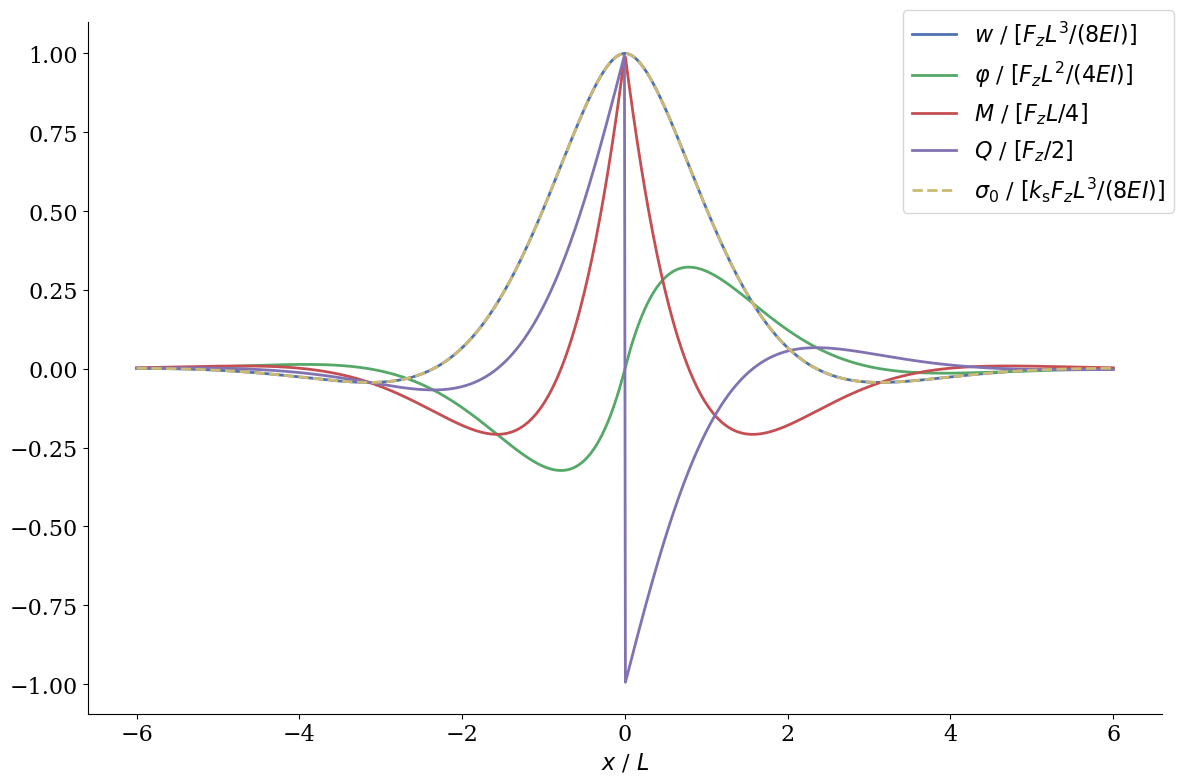

In [49]:
#HIDDEN
plot_bettung_einzel()

Zum besseren Verständnis der Schwächen des Bettungsmodulverfahrens (siehe o.g. Einschränkungen) schauen wir uns den Fall eines Balkens endlicher Länge $x \in [-a/2,a/2]$ an, der durch eine Linienlast $q(x)$ belastet werde.  Wir nehmen zusätzlich an, dass die Linienlast linear variiere:

$$
    q(x) = q_0 + m \frac{x}{a}
$$

Die Partikulärlösung wählen wir nach dem Typ der rechten Seite:

$$
    w_\text{p}(x) = \frac{q(x)}{k_\text{s} b} = \frac{L^4}{4EI} q(x)
$$

Die Randbedingungen

\begin{align}
    M(x = -a/2) &= M(x = a/2) = 0
    \
    Q(x = -a/2) &= Q(x = a/2) = 0
\end{align}

werden durch die Partikulärlösung bereits erfüllt, da $w_\text{p}'' = w_\text{p}''' \equiv 0$. Somit ist die Lösung durch die Partikulärlösung bestimmt. Wir erhalten:

\begin{align}
    w(x) &= \frac{q_0 + m \frac{x}{a}}{k_\text{s} b}
    \
    \varphi(x) &= \frac{m}{a k_\text{s}b}
    \
    M(x) &= 0
    \
    Q(x) &= 0
\end{align}

Diese Lösung ergibt ein querkraft- und biegemomentenfreies Fundament, dass sich unabhängig von seiner Steifigkeit in den Boden einstanzt. Der Setzungsverlauf ist identisch zum Verlauf der Linienlast.

Dieses Verhalten ist eine direkte Konsequenz des aus voneinander unabhängigen vertikal belastbaren Federn bestehenden Baugrundmodells (Winkler'scher Halbraum). Eine Setzungsmulde ergibt sich nur, wenn statt eines konstanten Bettungsmoduls $k_\text{s}(x)$ angesetzt wird. Diese Schwäche wird durch das Steifemodulverfahren nach Ohde ausgeglichen.

## Steifemodulverfahren

Wir starten wiederum mit der DGL 4. Ordnung für die Biegelinie des elastisch gebetteten Balkens in einer etwas anderen Schreibweise (der Balken sei geometrisch und materiell homogen)

$$
    \frac{\text{d}^4 w}{\text{d}x^4} = \frac{q(x) - \sigma_0(x) b}{EI}
$$

Die Herleitung kann ebenso für Platten geführt werden. Analytische Lösungen für elastisch gebettete Platten gibt es lediglich für einfache Belastungsformen. Die Lösung der Gleichungen erfolgt dann in der Regel mittels numerischer Verfahren. Zum grundlegenden Verständnis des Steifemodulverfahrens genügt die Angabe der Differentialgleichung für die Platte, die eine offensichtliche Analogie zur Balkentheorie erkennen lässt. Die Kirchhoff'sche Plattentheorie kann als die Erweiterung der Bernoulli'schen Balkentheorie auf Platten betrachtet werden. Für homogene, isotrope, dünne Biege-Platten mit transversaler Belastung (Achtung: beim Balken gilt nach obiger Schreibweise $[q] = \text{kN}\,\text{m}^{-1}$ als Linienlast, während bei der Platte nach folgender Gleichung als Flächenlast $[q] = \text{kN}\,\text{m}^{-2}$ definiert ist. In beiden Fällen gilt $[\sigma_0] = \text{kN}\,\text{m}^{-2}$ für die Sohlspannung) gilt

$$
    \frac{\partial^4 w}{\partial x^4} + 2\frac{\partial^4 w}{\partial x^2 \partial y^2} + \frac{\partial^4 w}{\partial y^4} = \frac{q(x,y) - \sigma_0(x,y)}{K}
$$

mit der Plattensteifigkeit

$$
    K = \frac{E h^3}{12(1-\nu^2)}
$$

Die Setzungsmulde muss der Biegelinie entsprechen. Also muss gelten

$$
    w(x,y) = s(x,y)
$$

Zunächst betrachten wir die Wirkung der Sohlpressung $\sigma_0$ auf ein infinitesimales Oberflächenelement $\text{d}x_\text{m} \times \text{d}y_\text{m}$ an der Stelle $x_\text{m},\,y_\text{m} \in a \times b$. Die resultierende infinitesimale Last $\text{d}F_z(x_\text{m},y_\text{m}) = \sigma_0(x_\text{m},y_\text{m}) \text{d}x_\text{m} \text{d}y_\text{m}$ ruft nach Boussinesq eine um den Kraftangriffspunkt zentrierte Setzungsmulde der Form

$$
    \text{d} s(x - x_\text{m},y - y_\text{m}) = \frac{\text{d}F_z(x_\text{m},y_\text{m}) (1-\nu^2)}{\pi E \sqrt{(x - x_\text{m})^2 + (y - y_\text{m})^2}} = \frac{\sigma_0(x_\text{m},y_\text{m}) (1-\nu^2)}{\pi E \sqrt{(x - x_\text{m})^2 + (y - y_\text{m})^2}} \text{d}x_\text{m}\text{d}y_\text{m}
$$

hervor. Die Setzungsmulden aller benachbarten infinitesimalen Einzellasten überlagern sich zur tatsächlichen Setzungsmulde:

$$
    s(x,y) = \frac{1-\nu^2}{\pi E} \int \limits_{y_\text{m}} \int \limits_{x_\text{m}} \frac{\sigma_0(x_\text{m},y_\text{m})}{\sqrt{(x - x_\text{m})^2 + (y - y_\text{m})^2}} \text{d}x_\text{m}\text{d}y_\text{m}
$$

Hier wird ein nichtlokaler Effekt deutlich, der durch die Welchselwirkung benachbarter Bodenelemente entsteht, die beim Bettungsmodulverfahren vernachlässigt wurde. Dieser Einfluss wird durch die Kernfunktion

$$
    f = \frac{1}{\sqrt{(x - x_\text{m})^2 + (y - y_\text{m})^2}} 
$$

beschrieben. Dadurch wird klar, dass der Beitrag eines an der Stelle $x_\text{m},\,y_\text{m}$ angreifenden Lastinkrements $\text{d}F_z$ zur Setzung an der Stelle $x,\,y$ mit der Entfernung beider Punkte abnimmt. Mit anderen Worten, die Setzung an einem Punkt wird dominiert durch die Lasten in der unmittelbaren Umgebung des Punktes, weniger jedoch durch weiter entfernte Punkte. Eine Absenkung der Platte an einem Punkt beeinflusst die auf die Platte wirkenden Randbedingungen in einem bestimmten Umfeld um diesen Punkt. Solch eine Wirkung wird als nichtlokal bezeichnet.

*Nebenbemerkung:* Nimmt man eine konstante Flächenlast an, so steht im Integranden lediglich die Einflussfunktion $f$. Integriert man diese über eine Rechteckfläche, so gelangt man zur bereits bekannten Lösung der schlaffen gleichförmig verteilten Rechtecklast. Mit diesem Vorgehen lässt sich die Last $\sigma_0$ auch in abschnittsweise konstante Teillasten zerlegen, und mittels der bereits bekannten $f$-Tafeln Steifeziffern bestimmen. Die Superposition der Teillösungen (Summe) ergibt dann die Setzungsmulde und die Sohlspannungsverteilung, für deren Bestimmung durch die Flächendiskretisierung genügend Gleichungen zur Verfügung stehen. Auf diese Berechnungen soll hier nicht näher eingegangen werden.

Zum Bettungsmodulverfahren gelangt man mit einer Kernfunktion in Form von Dirac-Deltas, die nur den lokalen Einfluss erlauben:

$$
    s(x,y) = \frac{1-\nu^2}{\pi E} \int \limits_{y_\text{m}} \int \limits_{x_\text{m}} \sigma_0(x_\text{m},y_\text{m}) \delta(x-x_\text{m})\delta(y-y_\text{m}) \text{d}x_\text{m}\text{d}y_\text{m} = \frac{1-\nu^2}{\pi E} \sigma_0(x,y)
$$

Die Einflussfunktion des Bettungsmodulverfahrens ist also:

$$
    f = \delta(x-x_\text{m})\delta(y-y_\text{m})
$$

*Anmerkung:* Mit diesen Überlegungen werden Generalisierungen der bisherigen Verfahren denkbar. So kann es sinnvoll sein, ein gewichtetes Mittel diverser Kernfunktionen zu berücksichtigen:

$$
    s(x,y) = \frac{1-\nu^2}{\pi E} \int \limits_{y_\text{m}} \int \limits_{x_\text{m}} \sigma_0(x_\text{m},y_\text{m}) \left[ \lambda f_\text{BMV} + (1-\lambda) f_\text{SMV} \right] \text{d}x_\text{m}\text{d}y_\text{m},
$$
wobei der Wichtungsfaktor $\lambda$ aus einer bestimmten Optimalitätsbedingung abgeleitet werden kann (hinsichtlich der Setzungsanteile oder anderweitiger Überlegungen).


Zum Gründungsbalken der Länge $l$ und Breite $b$ gelangen wir mit der Annahme, dass $\sigma_0$ nur in $x$-Richtung variabel ist. Somit finden wir:

$$
    s(x) = \frac{1-\nu^2}{\pi E} \int \limits_{-l/2}^{l/2} \sigma_0(x_\text{m}) f(x,x_\text{m}) \text{d}x_\text{m}
$$

mit der Kernfunktion

$$
    f(x,x_\text{m}) = \int \limits_{-b/2}^{b/2} \frac{\text{d}y}{\sqrt{(x - x_\text{m})^2 + y^2}}
$$